## 2.3 株式のリターン（リターン）を計算する

### コード2.16 銘柄 A0001 の 2012年〜13年の終値と市場のリターンデータの読み込み

In [1]:
import os
import pandas as pd
os.makedirs('./output', exist_ok=True)

# 日次株価データを読み込み
stockDaily = pd.read_csv('./data/stockDaily.csv', parse_dates=['date'])
stockDaily['date'] = stockDaily['date'].dt.to_period('D')
stockDaily = stockDaily.set_index('date').sort_index()

# 銘柄と日付で行を選択
df = stockDaily[stockDaily['ticker'] == 'A0001']
df = df.loc['2012-01-01': '2013-12-31', ['close']]
print(df)

# Fama-French 3ファクター・モデル用データの読み込み
ffDaily = pd.read_csv('./data/ffDaily.csv', parse_dates=['date'])
ffDaily['date'] = ffDaily['date'].dt.to_period('D')
ffDaily = ffDaily.set_index('date').sort_index()
# RMRF+RFを市場のリターンとして利用する
ffDaily['RM'] = ffDaily['RMRF'] + ffDaily['RF']
print(ffDaily)

            close
date             
2012-01-04   1683
2012-01-05   1666
2012-01-06   1655
2012-01-10   1668
2012-01-11   1667
...           ...
2013-12-24   1191
2013-12-25   1195
2013-12-26   1208
2013-12-27   1196
2013-12-30   1195

[493 rows x 1 columns]
            RMRF   SMB   HML    RF    RM
date                                    
1990-07-02 -0.08  1.46 -0.73  0.03 -0.05
1990-07-03 -0.40  0.65 -0.41  0.03 -0.37
1990-07-04  1.49 -0.01  0.32  0.03  1.52
1990-07-05  0.16  2.71 -0.12  0.03  0.19
1990-07-06  1.17  0.74 -0.03  0.03  1.20
...          ...   ...   ...   ...   ...
2015-06-24  1.05 -0.50 -0.15  0.00  1.05
2015-06-25  0.61 -0.04 -0.38  0.00  0.61
2015-06-26  0.92 -0.16  0.11  0.00  0.92
2015-06-29  0.05 -0.16  0.01  0.00  0.05
2015-06-30 -0.87 -0.04  0.17  0.00 -0.87

[6149 rows x 5 columns]


### コード2.17 リターンと超過リターンの計算

In [2]:
ds = df.copy()
# close列によるリターンの計算はpct_change()メソッドで実現できる
ds['return'] = ds['close'].pct_change() * 100
# 行ラベルをキーにして、ffDailyのRMRFを結合する
ds = ds.join(ffDaily)
# 超過リターンの計算
ds['ereturn'] = ds['return'] - ds['RM']
# リターンと超過リターンの累積計算
ds['return_accum'] = ds['return'].cumsum()
ds['ereturn_accum'] = ds['ereturn'].cumsum()
print(ds)

            close     return  RMRF   SMB   HML   RF    RM    ereturn  \
date                                                                   
2012-01-04   1683        NaN  0.61 -0.32  0.15  0.0  0.61        NaN   
2012-01-05   1666  -1.010101  0.39 -0.13 -0.18  0.0  0.39  -1.400101   
2012-01-06   1655  -0.660264  0.13  0.04  0.17  0.0  0.13  -0.790264   
2012-01-10   1668   0.785498 -0.94  0.38 -0.19  0.0 -0.94   1.725498   
2012-01-11   1667  -0.059952  0.38  0.19  0.14  0.0  0.38  -0.439952   
...           ...        ...   ...   ...   ...  ...   ...        ...   
2013-12-24   1191 -10.786517  0.45 -0.07  0.10  0.0  0.45 -11.236517   
2013-12-25   1195   0.335852 -0.10  0.42 -0.06  0.0 -0.10   0.435852   
2013-12-26   1208   1.087866  1.73  0.26 -0.24  0.0  1.73  -0.642134   
2013-12-27   1196  -0.993377  0.14 -0.13  0.80  0.0  0.14  -1.133377   
2013-12-30   1195  -0.083612  0.49 -0.14 -0.24  0.0  0.49  -0.573612   

            return_accum  ereturn_accum  
date                 

### コード2.18 リターンと超過リターンの推移を視覚化する

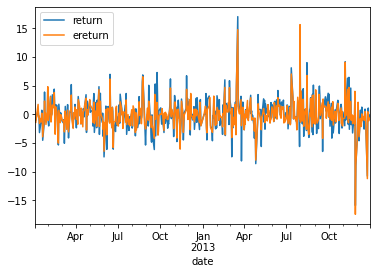

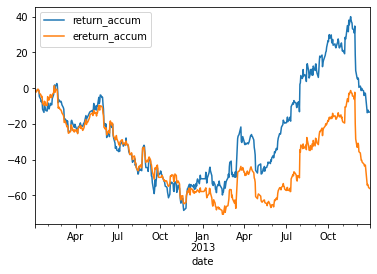

In [3]:
# リターンと超過収リターンの推移チャート
ax = ds[['return', 'ereturn']].plot()
# それぞれの累積推移チャート
ax = ds[['return_accum', 'ereturn_accum']].plot()